# Hunting down solid electrolyte interphase dynamics using operando optical fibre IR spectroscopy and multivariate curve analysis methods

## Imports regular packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os, sys, copy, warnings, time, math, pickle, locale, cycler, copy
from datetime import datetime, timedelta, timezone
from zoneinfo import ZoneInfo
from pathlib import Path

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize, TABLEAU_COLORS
import matplotlib.colors as mcolors
from matplotlib import rcParams
from matplotlib.ticker import NullFormatter, FixedLocator, AutoMinorLocator, FuncFormatter
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec

from scipy.misc import derivative
from scipy import ndimage, misc, stats, signal, interpolate
from scipy.interpolate import interp1d, PchipInterpolator

from sklearn.linear_model import LinearRegression
import sklearn

from IPython.display import Markdown, display
from cycler import cycler

import opusFC
import spectrochempy as scp
from spectrochempy import NDDataset
scp.set_loglevel('DEBUG')

import octavvs.algorithms.atm_correction
from pybaselines import Baseline, utils
import pybaselines.polynomial

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.7.dev8© Copyright 2014-2024 - A.Travert & C.Fernandez @ LCS


 WARNING | (NeedsUpdateWarning) SpectroChemPy v0.6.7 is available.
           Please consider updating, using pip or conda, for bug fixes and new features!
           *Version 0.6 has made some important changes that may require modification of existing scripts.*


In [2]:
%matplotlib inline
plt.style.use('default')
plt.style.use('seaborn-v0_8-notebook') # 'seborn-paper'default
rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])


## Imports of custom code

In [3]:
from eciru_minimal import EC_file_minimal, time_IR_spectra_minimal, OperandoExperimentSimple_minimal, interpolate_spectra
from MCRALS_minimal import *
if not 'data' in os.listdir('.'): warnings.warn(f'data folder is missing, you should maybe unzip data.zip')
if not 'compute_results' in os.listdir('.'): os.mkdir('compute_results')

## Imports of reference spectra

In [4]:
tir_dtgs = time_IR_spectra_minimal('atm_ref.csv')

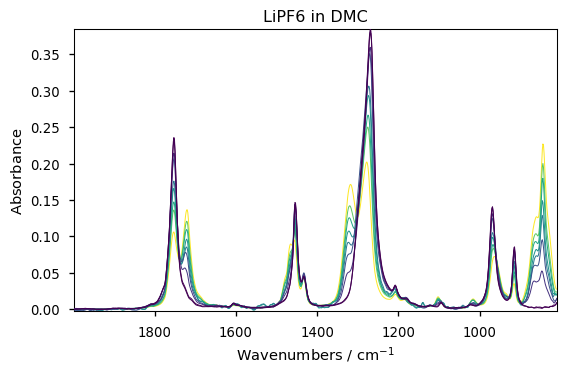

In [5]:
tirLIPF6DMC = time_IR_spectra_minimal('tirLIPF6DMC.csv')
tir=tirLIPF6DMC
NdAB = tir.NdAB
Lc = [0.0, 0.0, 0.3, 0.5, 1.2, 1.0, 0.8, 1.5, 2.0]
dc = scp.Coord(Lc, title="SaltConcentration", history="creation", units='mol.L')
NdAB.set_coordset((dc, NdAB.x))
NdAB.history=['Added Concentration as Label']
_ = NdAB[:, 2000.:810.].plot(title='LiPF6 in DMC')

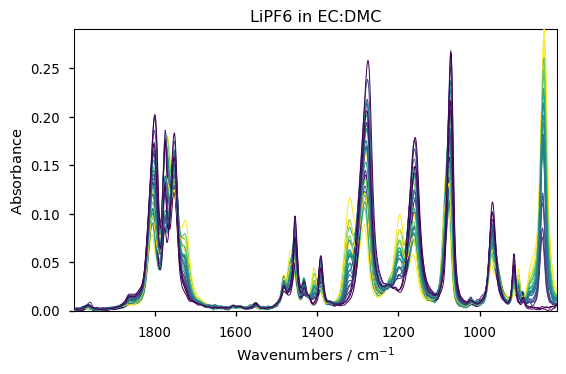

In [6]:
tirLIPF6ECDMC = time_IR_spectra_minimal('tirLIPF6ECDMC.csv')
tir=tirLIPF6ECDMC
NdAB = tir.NdAB

LfEC=[0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667]
LfDMC=[0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5, 0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.6667,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333,  0.3333]
Lc = [0.0,  0.3,  0.5,  0.8,  1.0,  1.2,  1.5,  2.0,  0.0,  0.5,  0.8,  0.8,  1.0,  1.0,  1.0,  1.2,  1.5,  2.0,  0.0,  0.3,  0.5,  0.8,  1.0,  1.2,  1.5,  2.0]

dc = scp.Coord(Lc, title="SaltConcentration", history="creation", units='mol.L')
dfEC = scp.Coord(LfEC, title="ECfraction", history="creation")
dfDMC = scp.Coord(LfDMC, title="DMCfraction", history="creation")

NdAB.set_coordset(([dc, dfEC, dfDMC], NdAB.x))
NdAB.history=['Added Concentration as Label']
_ = NdAB[:, 2000.:810.].plot(title='LiPF6 in EC:DMC')



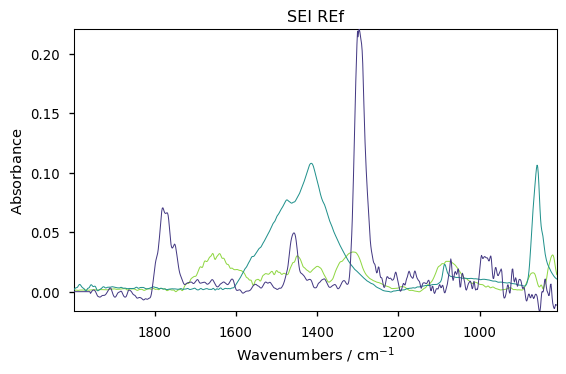

In [7]:
tirrefSEI = time_IR_spectra_minimal('refSEI.csv')
tir=tirrefSEI
NdAB = tir.NdAB
Llabel = ['DMDOHC', 'Li2CO3', 'CoOSEI',]
tirrefSEI.NdAB.y.labels = Llabel
_ = NdAB[:, 2000.:810.].plot(title='SEI REf')
NdAB_refSEI = NdAB

## Importing Operando Data

In [8]:
Operando={}

In [9]:
OperandoSummary=pd.read_excel('data/Operando_Summary_Paper.xlsx')
OperandoSummary.set_index('Name', inplace=True)
OperandoSummary

,Tag For Paper,Short-Description,Cathode,Deposotion,Electrolyte,Anode
Name,,,,,,
F1-102,Cu Pvdf - LiPF6 in DMC,NaN,Cu Pvdf,Slurry NMP,1M LiPF6 in DMC,Li Metal
F1-109,LTO - LP30,LTO - LP30,LTO/SuperP 90/10,Drop-casting Ethanol,LP30 Dodo,Li Metal
F1-112,Cu Pvdf - LP30,Cu - LP30,Cu Pvdf,NaN,LP30 Dodo,Li Metal
F1-124,Sn - LP30,Sn Intermittent,Sn Powder,Drop-casting Ethanol,LP30 Dodo,Li Metal
F1-125,CoO/SuperP - LP30,CoO Intermittent,CoO/SuperP 90/10 SPEX 5min in Eth/CMC,Drop-casting Ethanol,LP30 Dodo,Li Metal
F1-128,LTO - LP30 - Long Cycling,LTO Long Cycling,LTO/SuperP 90/10,Drop-casting Ethanol,LP30 Dodo,Li Metal
F1-132,Cu Pvdf - LP30+2% VC,Cu Pvdf VC,Cu Pvdf HFP,Drop-casting Ethanol,LP30 Dodo + 2% VC,Li Metal


In [10]:
Lnum = [112, 125, 124, 109,  102, 132, 128]

In [11]:
for num in Lnum:
    print(num)
    op=OperandoExperimentSimple_minimal(num)
    op.su=OperandoSummary.loc[op.cell_id,:]
    Operando[num]=op

112
125
124
109
102
132
128


## Pre-Processings Operando Data
Water vapour correction and baselining.

In [12]:
for num in Lnum:
    print(num)
    tir=Operando[num].tir
    NdAB=tir.NdAB.copy()
    
    atm = interpolate_spectra(tir.Lwn, tir_dtgs.Lwn, tir_dtgs.NdAB[2, :].data)
    NdAB.data=octavvs.algorithms.atm_correction.atmospheric(wn=NdAB.x.data, y=NdAB.data, atm=atm)[0]
    NdAB.history='Correct Water Vapour' 
    #ax = NdAB[:, 4000.:800.].plot(figsize=(8,3), title=f"{Operando[num].cell_id} - Original Data")
    tir.NdAB_vapCorr = NdAB.copy()

    # Fitting spectra with a fist order polynomial and store it in tir.NdAB_scp
    x=NdAB.x.data
    fitting_range = ( ((x < 2700) & (x > 2420)) | ((x < 2220) & (x > 2000)) )
    weights = np.zeros_like(x)
    weights[fitting_range] = 1
    baseline_ = np.zeros_like(NdAB.data)
    for k, y in enumerate(NdAB.data):
        baseline_[k] = pybaselines.polynomial.poly(y, x, poly_order=1, weights=weights)[0]
    NdAB.data = NdAB.data - baseline_
    NdAB.history='First order baseline'
    #ax = NdAB[:, 4000.:800.].plot(figsize=(8,3), title=f"{Operando[num].cell_id} - 1st order baseline")    
    tir.NdAB_scp = NdAB.copy()

    # Calculating A(t)-A(T_0) and fitting spectra with a second order polynomia,l and store it in tir.NdAB_var_SEI
    NdAB = tir.NdAB_scp - tir.NdAB_scp[0]
    weights = np.zeros_like(x)
    weights[(x < 2000.) & (x > 1900.)] , weights[(x < 1580.) & (x > 1570.)] , weights[(x < 940.) & (x > 925.)] = 1, 10, 5
    baseline_ = np.zeros_like(NdAB.data)
    for k, y in enumerate(NdAB.data):
        baseline_[k] = pybaselines.polynomial.poly(y, x, poly_order=2, weights=weights)[0]
    NdAB.data = NdAB.data - baseline_    
    NdAB.history='Second order baseline, adapted for SEI'
    #ax = NdAB[:, 2000.:800.].plot(figsize=(8,3), title=f"{Operando[num].cell_id} - 2nd order baseline - SEI")
    tir.NdAB_var_SEI = NdAB.copy()
    tir.AB_var_SEI = tir.NdAB_var_SEI.data.copy()

112
125
124
109
102
132
128


<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

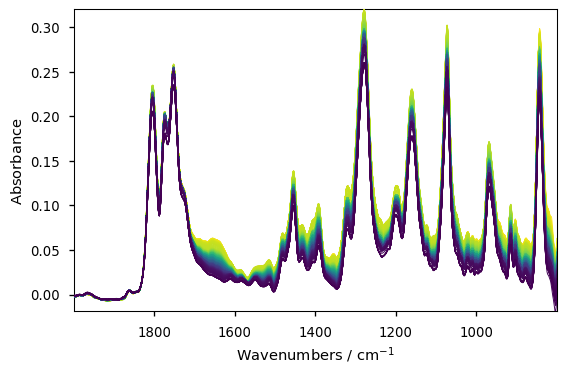

In [13]:
Operando[109].tir.NdAB_scp[:, 2000.:800.].plot()

<_Axes: xlabel='Wavenumbers $\\mathrm{/\\ \\mathrm{cm}^{-1}}$', ylabel='Absorbance $\\mathrm{}$'>

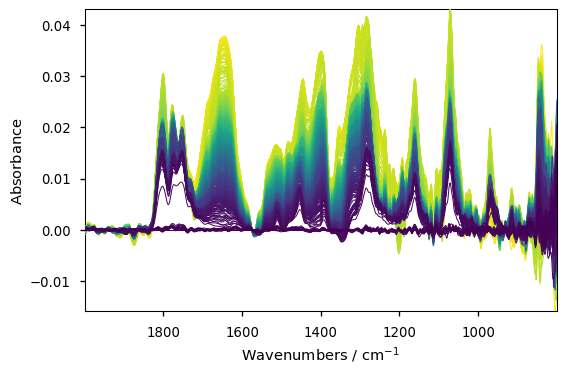

In [14]:
Operando[109].tir.NdAB_var_SEI[:, 2000.:800.].plot()

## 2 components for electrolyte - 2 components for electrolyte for SEI 

In [15]:
dic_LMCR_2_2_HardCalib_fitElectrolyte={}
dic_df_mse_2_2_HardCalib_fitElectrolyte={}

In [16]:
for num in [102]:
    print(num)
    ### Initializing Input Data
    wn_max, wn_min = 2000., 900.
    Lwn = Operando[num].tir.NdAB.x[wn_max:wn_min].data
    Lth = Operando[num].tir.Lth
    X_calib2 = tirLIPF6DMC.NdAB[:, wn_max:wn_min].data
    X_calib = X_calib2
    X_calib = X_calib/np.sqrt((X_calib**2).sum()/X_calib.size)
    
    n_electrolyte, n_sei = 2, 2
    
    # MCR-ALS for electrolyte initialization
    ST_electrolyte = initialize_calibration_X_calib(X_calib, mcrar_1='auto', n_electrolyte=n_electrolyte)
    
    # Preparing other input data : A, matrix of additional initialization
    # spectra used for the first regression; and D, spectrum of operando spectra 
    A = 0.01 * np.ones((n_electrolyte + n_sei, X_calib.shape[1]))
    A[:n_electrolyte, :] = ST_electrolyte
    A[n_electrolyte, :] = NdAB_refSEI['CoOSEI', wn_max:wn_min].data
    A[n_electrolyte + 1, :] = NdAB_refSEI['Li2CO3', wn_max:wn_min].data

    D = Operando[num].tir.NdAB_var_SEI[:, wn_max:wn_min].data
    D = D/np.sqrt((D**2).sum()/D.size)
    X=[X_calib, A, D]

    # Setting zero-concentration concentration for extra components
    #for the calibration data : only 2 spectra to be used
    B = np.nan*np.ones((n_electrolyte+n_sei, D.shape[0]+X_calib.shape[0]))
    B[n_electrolyte:, -X_calib.shape[0]:] = 0

    #  Contraint spectra of electolyte to these calculated from X_calib
    BS = np.nan*np.ones((n_electrolyte + n_sei, D.shape[1]))
    BS[:n_electrolyte, :] = ST_electrolyte

    scp.set_loglevel('DEBUG')
    # The MCR-ALS decomposition is computed through several values of
    # alpha_electrolyte (weight of operando vs calibration spectra in
    # the concatenated matrix for decomposition) and alpha_fit (parameter
    # governing the refitting contraint). 
    Lmcrar, df_mse = [], []
    for alpha_electrolyte in [0.1, 0.5, .7,  0.9]:
        for alpha_fit in [.0, .5, .9, .99, .999]:

            ### Weighting spectra for MCR-ALS2
            sample_weight = np.concatenate(((1-alpha_electrolyte) * np.ones((D.shape[0]))/np.linalg.norm(D)**2,
                                                alpha_electrolyte * np.ones((X_calib.shape[0]))/np.linalg.norm(X_calib)**2
                                                ))
            sample_weight=sample_weight/sample_weight.sum()
            fit_kwargs={'sample_weight':sample_weight}
            
            # Prepare the MCR-ALS for full dataset decomposition
            mcrar_2 = McrARTransformer_D_init2(max_iter=150,
                                            c_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                               st_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                            c_constraints=[ConstraintNonneg(I=np.array(n_electrolyte*[False]+n_sei*[True]), axis=0),
                                                           ConstraintHardEquality(B.T),],
                                            st_constraints=[ConstraintNonneg(), ConstraintHardEquality(BS), ConstraintElectrolyte(n_electrolyte, n_sei, alpha_fit), ConstraintNormalize()], st_fit_kwargs=fit_kwargs,
                                            tol_increase=1e4, tol_n_increase=100, tol_err_change=None, tol_n_above_min=50, verbose=0)
            
            mcrar_2.alpha_electrolyte = alpha_electrolyte
            mcrar_2.refit_electrolyte = alpha_fit
              
            # Build the scikit learn pipeline from the MCR.
            # This pipeline is applied on X=[X_calib, A, D]
            full_MCR = build_fullMCR_HardEqualityElectrolyte(mcrar_2)

            scp.set_loglevel('DEBUG')
            full_MCR.fit(X)
            
            ## Plotting global merits
            mcrar = full_MCR[-1]
            mcrar.D, mcrar.Lwn, mcrar.Lth = D, Lwn, Lth
            Lmcrar.append(mcrar)
            df_mse.append([alpha_electrolyte,
                           alpha_fit,
                            mse_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            mse_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),
                            R2_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            R2_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),]),
                                    
    dic_LMCR_2_2_HardCalib_fitElectrolyte[num] = Lmcrar
    dic_df_mse_2_2_HardCalib_fitElectrolyte[num] = pd.DataFrame(df_mse, columns=['alpha_electrolyte', 'refit_electrolyte', 'mse operando', 'mse calib', 'R2 operando', 'R2 calib'])    


102


 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


Max iterations reached (100).
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 5

### F1-102 - CuPvdf - LiPF6 in DMC

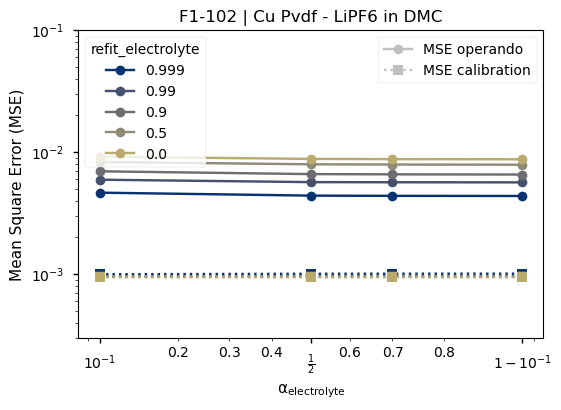

In [17]:
num=102
df_mse = dic_df_mse_2_2_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

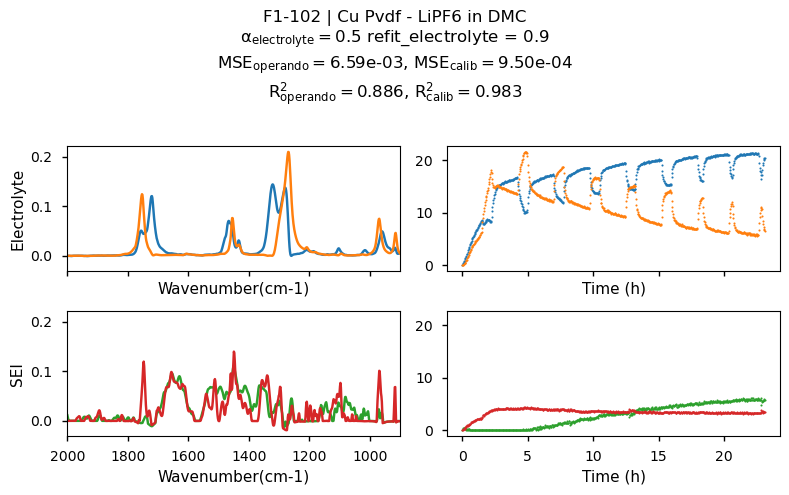

In [18]:
num=102
Lmcrar = dic_LMCR_2_2_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_2_2_HardCalib_fitElectrolyte[num]
index = df_mse.query('refit_electrolyte==0.9 & alpha_electrolyte==.5').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, ], [2, 3]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')
save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-102_2_2_HardElec_RefitElec_')

## 4 components for electrolyte - 4 components for electrolyte for SEI 

In [19]:
dic_LMCR_4_4_HardCalib_fitElectrolyte={}
dic_df_mse_4_4_HardCalib_fitElectrolyte={}

In [20]:
for num in [112]:
    print(num)
    ### Initializing Input Data
    wn_max, wn_min = 2000., 900.
    Lwn = Operando[num].tir.NdAB.x[wn_max:wn_min].data
    Lth = Operando[num].tir.Lth
    X_calib2 = tirLIPF6ECDMC.NdAB[:, wn_max:wn_min].data
    X_calib = X_calib2
    X_calib = X_calib/np.sqrt((X_calib**2).sum()/X_calib.size)
    
    n_electrolyte, n_sei = 4, 4
    
    # MCR-ALS for electrolyte initialization
    ST_electrolyte = initialize_calibration_X_calib(X_calib, mcrar_1='auto', n_electrolyte=n_electrolyte)
    
    # Preparing other input data : A, matrix of additional initialization
    # spectra used for the first regression; and D, spectrum of operando spectra 
    A = 0.01 * np.ones((n_electrolyte + n_sei, X_calib.shape[1]))
    A[:n_electrolyte, :] = ST_electrolyte
    A[n_electrolyte, :] = NdAB_refSEI['CoOSEI', wn_max:wn_min].data
    A[n_electrolyte + 1, :] = NdAB_refSEI['Li2CO3', wn_max:wn_min].data
    A[n_electrolyte + 2, :] = NdAB_refSEI['DMDOHC', wn_max:wn_min].data

    D = Operando[num].tir.NdAB_var_SEI[:, wn_max:wn_min].data
    D = D/np.sqrt((D**2).sum()/D.size)
    X=[X_calib, A, D]

    # Setting zero-concentration concentration for extra components
    #for the calibration data : only 4 spectra to be used
    B = np.nan*np.ones((n_electrolyte+n_sei, D.shape[0]+X_calib.shape[0]))
    B[n_electrolyte:, -X_calib.shape[0]:] = 0

    #  Contraint spectra of electolyte to these calculated from X_calib
    BS = np.nan*np.ones((n_electrolyte + n_sei, D.shape[1]))
    BS[:n_electrolyte, :] = ST_electrolyte

    scp.set_loglevel('DEBUG')
    # The MCR-ALS decomposition is computed through several values of
    # alpha_electrolyte (weight of operando vs calibration spectra in
    # the concatenated matrix for decomposition) and alpha_fit (parameter
    # governing the refitting contraint). 
    Lmcrar, df_mse = [], []
    for alpha_electrolyte in [0.1, 0.5, .7,  0.9]:
        for alpha_fit in [.0, .5, .9, .99, .999]:

            ### Weighting spectra for MCR-ALS2
            sample_weight = np.concatenate(((1-alpha_electrolyte) * np.ones((D.shape[0]))/np.linalg.norm(D)**2,
                                                alpha_electrolyte * np.ones((X_calib.shape[0]))/np.linalg.norm(X_calib)**2
                                                ))
            sample_weight=sample_weight/sample_weight.sum()
            fit_kwargs={'sample_weight':sample_weight}
            
            # Prepare the MCR-ALS for full dataset decomposition
            mcrar_2 = McrARTransformer_D_init2(max_iter=150,
                                            c_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                               st_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                            c_constraints=[ConstraintNonneg(I=np.array(n_electrolyte*[False]+n_sei*[True]), axis=0),
                                                           ConstraintHardEquality(B.T),],
                                            st_constraints=[ConstraintNonneg(), ConstraintHardEquality(BS), ConstraintElectrolyte(n_electrolyte, n_sei, alpha_fit), ConstraintNormalize()], st_fit_kwargs=fit_kwargs,
                                            tol_increase=1e4, tol_n_increase=100, tol_err_change=None, tol_n_above_min=50, verbose=0)
            
            mcrar_2.alpha_electrolyte = alpha_electrolyte
            mcrar_2.refit_electrolyte = alpha_fit
              
            # Build the scikit learn pipeline from the MCR.
            # This pipeline is applied on X=[X_calib, A, D]
            full_MCR = build_fullMCR_HardEqualityElectrolyte(mcrar_2)

            scp.set_loglevel('DEBUG')
            full_MCR.fit(X)
            
            ## Plotting global merits
            mcrar = full_MCR[-1]
            mcrar.D, mcrar.Lwn, mcrar.Lth = D, Lwn, Lth
            Lmcrar.append(mcrar)
            df_mse.append([alpha_electrolyte,
                           alpha_fit,
                            mse_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            mse_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),
                            R2_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            R2_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),]),
                                    
    dic_LMCR_4_4_HardCalib_fitElectrolyte[num] = Lmcrar
    dic_df_mse_4_4_HardCalib_fitElectrolyte[num] = pd.DataFrame(df_mse, columns=['alpha_electrolyte', 'refit_electrolyte', 'mse operando', 'mse calib', 'R2 operando', 'R2 calib'])    


 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


112
Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. E

### F1-112 Intermittent CuPVDF - LP30

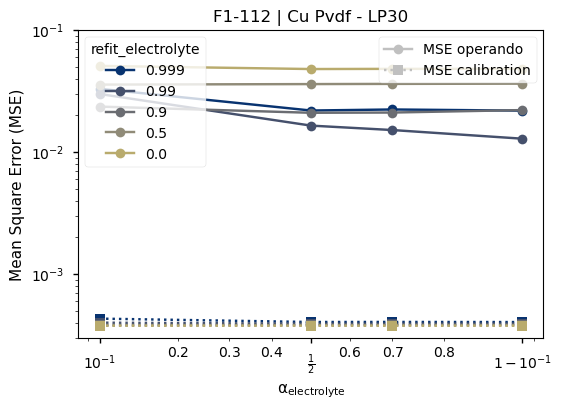

In [21]:
num=112
df_mse = dic_df_mse_4_4_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

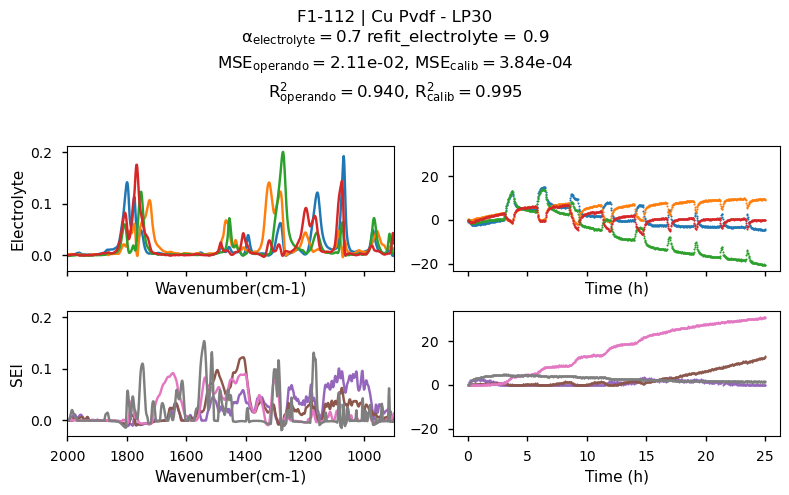

In [22]:
num=112
Lmcrar = dic_LMCR_4_4_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_4_HardCalib_fitElectrolyte[num]
index = df_mse.query('refit_electrolyte==0.9 & alpha_electrolyte==.7').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, 2, 3], [4, 5, 6, 7]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')
save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-112_4_4_HardElec_RefitElec_')

## 4 components for electrolyte - 2 components for electrolyte for SEI 

In [23]:
dic_LMCR_4_2_HardCalib_fitElectrolyte={}
dic_df_mse_4_2_HardCalib_fitElectrolyte={}

In [24]:
for num in [132, 124, 125, 109, ]:
    print(num)
    ### Initializing Input Data
    wn_max, wn_min = 2000., 900.
    Lwn = Operando[num].tir.NdAB.x[wn_max:wn_min].data
    Lth = Operando[num].tir.Lth
    X_calib2 = tirLIPF6ECDMC.NdAB[:, wn_max:wn_min].data
    X_calib = X_calib2
    X_calib = X_calib/np.sqrt((X_calib**2).sum()/X_calib.size)
    
    n_electrolyte, n_sei = 4, 2
    
    # MCR-ALS for electrolyte initialization
    ST_electrolyte = initialize_calibration_X_calib(X_calib, mcrar_1='auto', n_electrolyte=n_electrolyte)
    
    # Preparing other input data : A, matrix of additional initialization
    # spectra used for the first regression; and D, spectrum of operando spectra 
    A = 0.01 * np.ones((n_electrolyte + n_sei, X_calib.shape[1]))
    A[:n_electrolyte, :] = ST_electrolyte
    A[n_electrolyte, :] = NdAB_refSEI['CoOSEI', wn_max:wn_min].data
    A[n_electrolyte + 1, :] = NdAB_refSEI['Li2CO3', wn_max:wn_min].data
    D = Operando[num].tir.NdAB_var_SEI[:, wn_max:wn_min].data
    D = D/np.sqrt((D**2).sum()/D.size)
    X=[X_calib, A, D]

    # Setting zero-concentration concentration for extra components
    #for the calibration data : only 4 spectra to be used
    B = np.nan*np.ones((n_electrolyte+n_sei, D.shape[0]+X_calib.shape[0]))
    B[n_electrolyte:, -X_calib.shape[0]:] = 0

    #  Contraint spectra of electolyte to these calculated from X_calib
    BS = np.nan*np.ones((n_electrolyte + n_sei, D.shape[1]))
    BS[:n_electrolyte, :] = ST_electrolyte

    scp.set_loglevel('DEBUG')
    # The MCR-ALS decomposition is computed through several values of
    # alpha_electrolyte (weight of operando vs calibration spectra in
    # the concatenated matrix for decomposition) and alpha_fit (parameter
    # governing the refitting contraint). 
    Lmcrar, df_mse = [], []
    for alpha_electrolyte in [0.1, 0.5, .7,  0.9]:
        for alpha_fit in [.0, .5, .9, .99, .999]:

            ### Weighting spectra for MCR-ALS2
            sample_weight = np.concatenate(((1-alpha_electrolyte) * np.ones((D.shape[0]))/np.linalg.norm(D)**2,
                                                alpha_electrolyte * np.ones((X_calib.shape[0]))/np.linalg.norm(X_calib)**2
                                                ))
            sample_weight=sample_weight/sample_weight.sum()
            fit_kwargs={'sample_weight':sample_weight}
            
            # Prepare the MCR-ALS for full dataset decomposition
            mcrar_2 = McrARTransformer_D_init2(max_iter=150,
                                            c_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                               st_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                            c_constraints=[ConstraintNonneg(I=np.array(n_electrolyte*[False]+n_sei*[True]), axis=0),
                                                           ConstraintHardEquality(B.T),],
                                            st_constraints=[ConstraintNonneg(), ConstraintHardEquality(BS), ConstraintElectrolyte(n_electrolyte, n_sei, alpha_fit), ConstraintNormalize()], st_fit_kwargs=fit_kwargs,
                                            tol_increase=1e4, tol_n_increase=100, tol_err_change=None, tol_n_above_min=50, verbose=0)
            
            mcrar_2.alpha_electrolyte = alpha_electrolyte
            mcrar_2.refit_electrolyte = alpha_fit
              
            # Build the scikit learn pipeline from the MCR.
            # This pipeline is applied on X=[X_calib, A, D]
            full_MCR = build_fullMCR_HardEqualityElectrolyte(mcrar_2)

            scp.set_loglevel('DEBUG')
            full_MCR.fit(X)
            
            ## Plotting global merits
            mcrar = full_MCR[-1]
            mcrar.D, mcrar.Lwn, mcrar.Lth = D, Lwn, Lth
            Lmcrar.append(mcrar)
            df_mse.append([alpha_electrolyte,
                           alpha_fit,
                            mse_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            mse_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),
                            R2_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            R2_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),]),
                                    
    dic_LMCR_4_2_HardCalib_fitElectrolyte[num] = Lmcrar
    dic_df_mse_4_2_HardCalib_fitElectrolyte[num] = pd.DataFrame(df_mse, columns=['alpha_electrolyte', 'refit_electrolyte', 'mse operando', 'mse calib', 'R2 operando', 'R2 calib'])    


 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


132
Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. E

 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


124
Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Max iterations reached (150).
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Max iterations reached (150).
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Max iterations reached (150).
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.


 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiti

 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Max iterations reached (150).
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Max iterations reached (150).
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Max iterations reached (150).
Max iterations reached (150).


### F1-132 - Intermittent CuPVDF - LP30 + 2%VC

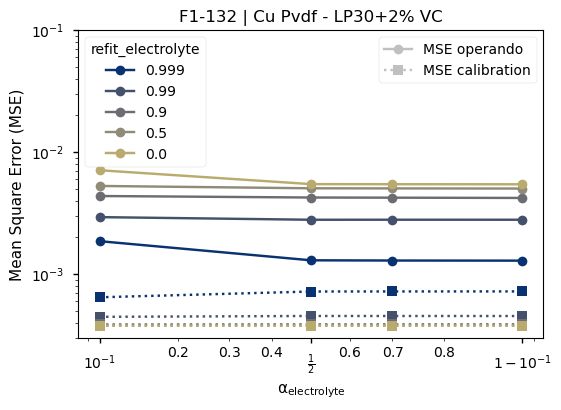

In [25]:
num=132
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

Text(0.5, 0.98, 'F1-132 | Cu Pvdf - LP30+2% VC\n$\\alpha_{electrolyte} = 0.5$ refit_electrolyte = 0.9\n$MSE_{operando}=$4.24e-03, $MSE_{calib}=$3.87e-04\n$R^2_{operando}=$0.976, $R^2_{calib}=$0.995\n')

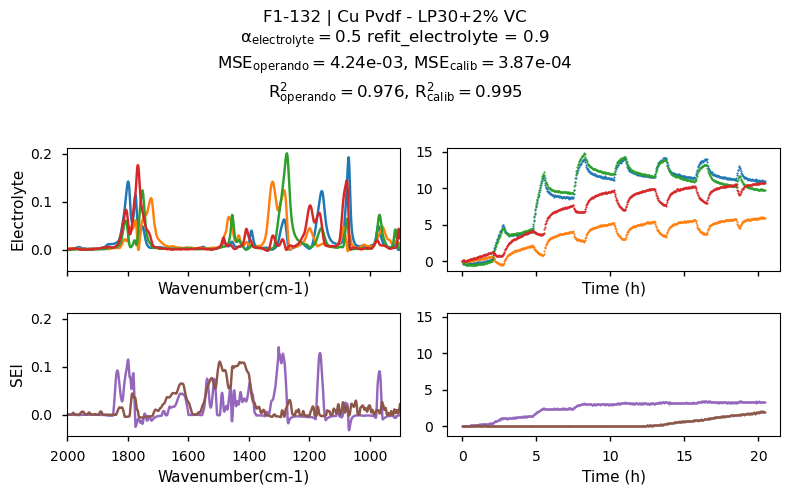

In [26]:
num=132
Lmcrar = dic_LMCR_4_2_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
index = df_mse.query('alpha_electrolyte==0.5 & refit_electrolyte==.9').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, 2, 3], [4, 5]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')
#save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-132_4_2_HardElec_RefitElec_')

### F1-124 Intermittent Sn - LP30

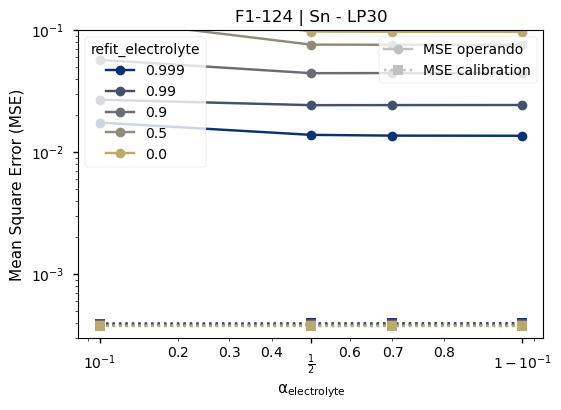

In [27]:
num=124
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

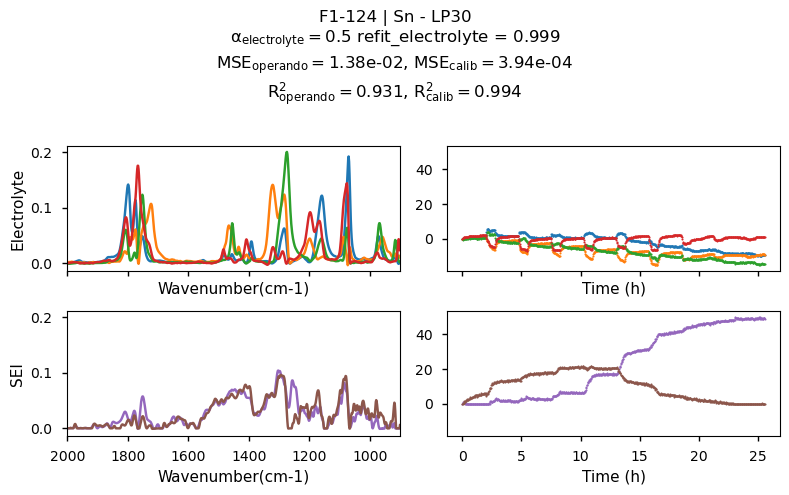

In [28]:
num=124
Lmcrar = dic_LMCR_4_2_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
index = df_mse.query('alpha_electrolyte==0.5 & refit_electrolyte==.999').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, 2, 3], [4, 5]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')
save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-124_4_2_HardElec_RefitElec_')

### F1-125 - Intermittent CoO - LP30

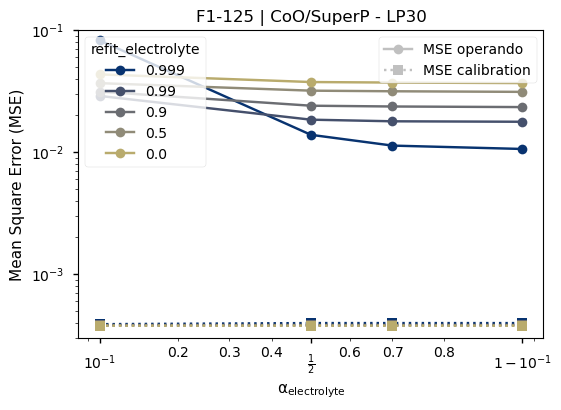

In [29]:
num=125
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

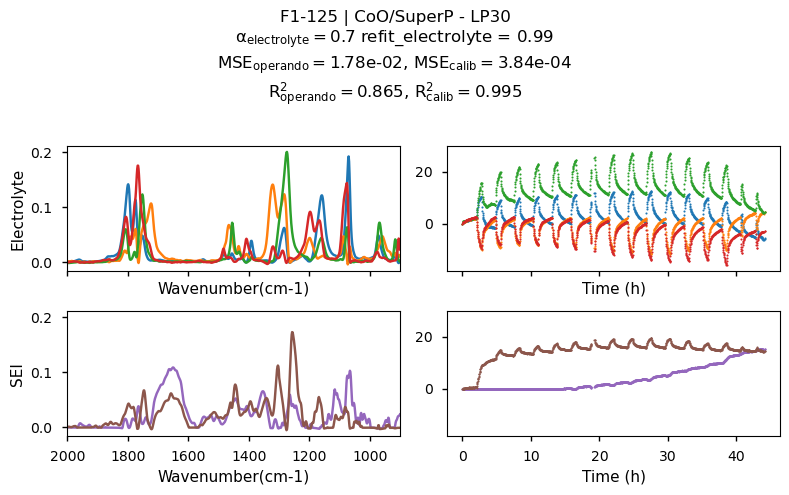

In [30]:
num=125
Lmcrar = dic_LMCR_4_2_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
index = df_mse.query('alpha_electrolyte==0.7 & refit_electrolyte==.99').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, 2, 3], [4, 5]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')
save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-125_4_2_HardElec_RefitElec_')

### F1-109 - Intermittent LTO - LP30

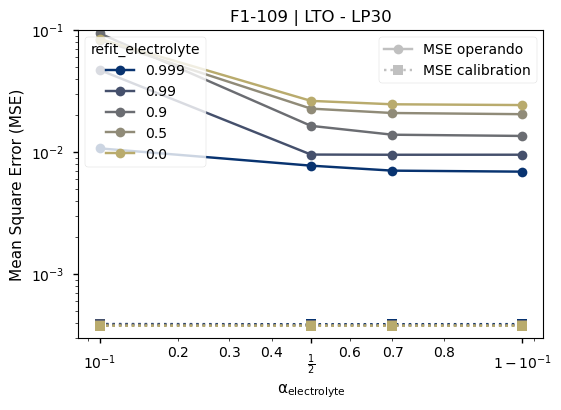

In [31]:
num=109
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

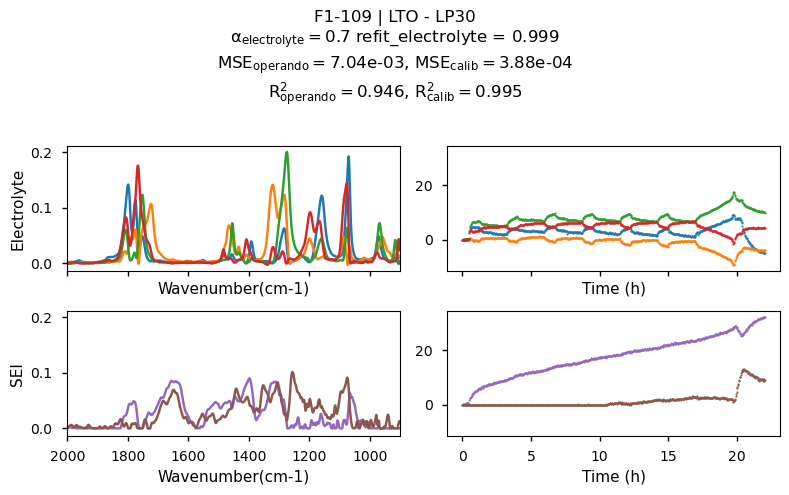

In [32]:
num=109
Lmcrar = dic_LMCR_4_2_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_2_HardCalib_fitElectrolyte[num]
index = df_mse.query('alpha_electrolyte==0.7 & refit_electrolyte==.999').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, 2, 3], [4, 5]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')

save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-109_4_2_HardElec_RefitElec_')


## 4 components for electrolyte - 3 components for electrolyte for SEI 

In [33]:
dic_LMCR_4_3_HardCalib_fitElectrolyte={}
dic_df_mse_4_3_HardCalib_fitElectrolyte={}

In [34]:
for num in [128]:
    print(num)
    ### Initializing Input Data
    wn_max, wn_min = 2000., 900.
    Lwn = Operando[num].tir.NdAB.x[wn_max:wn_min].data
    Lth = Operando[num].tir.Lth
    X_calib2 = tirLIPF6ECDMC.NdAB[:, wn_max:wn_min].data
    X_calib = X_calib2
    X_calib = X_calib/np.sqrt((X_calib**2).sum()/X_calib.size)
    
    n_electrolyte, n_sei = 4, 3
    
    # MCR-ALS for electrolyte initialization
    ST_electrolyte = initialize_calibration_X_calib(X_calib, mcrar_1='auto', n_electrolyte=n_electrolyte)
    
    # Preparing other input data : A, matrix of additional initialization
    # spectra used for the first regression; and D, spectrum of operando spectra 
    A = 0.01 * np.ones((n_electrolyte + n_sei, X_calib.shape[1]))
    A[:n_electrolyte, :] = ST_electrolyte
    A[n_electrolyte, :] = NdAB_refSEI['CoOSEI', wn_max:wn_min].data
    A[n_electrolyte + 1, :] = NdAB_refSEI['Li2CO3', wn_max:wn_min].data
    A[n_electrolyte + 2, :] = NdAB_refSEI['DMDOHC', wn_max:wn_min].data

    D = Operando[num].tir.NdAB_var_SEI[:, wn_max:wn_min].data
    D = D/np.sqrt((D**2).sum()/D.size)
    X=[X_calib, A, D]

    # Setting zero-concentration concentration for extra components
    #for the calibration data : only 4 spectra to be used
    B = np.nan*np.ones((n_electrolyte+n_sei, D.shape[0]+X_calib.shape[0]))
    B[n_electrolyte:, -X_calib.shape[0]:] = 0

    #  Contraint spectra of electolyte to these calculated from X_calib
    BS = np.nan*np.ones((n_electrolyte + n_sei, D.shape[1]))
    BS[:n_electrolyte, :] = ST_electrolyte

    scp.set_loglevel('DEBUG')
    # The MCR-ALS decomposition is computed through several values of
    # alpha_electrolyte (weight of operando vs calibration spectra in
    # the concatenated matrix for decomposition) and alpha_fit (parameter
    # governing the refitting contraint). 
    Lmcrar, df_mse = [], []
    for alpha_electrolyte in [0.1, 0.5, .7,  0.9]:
        for alpha_fit in [.0, .5, .9, .99, .999]:

            ### Weighting spectra for MCR-ALS2
            sample_weight = np.concatenate(((1-alpha_electrolyte) * np.ones((D.shape[0]))/np.linalg.norm(D)**2,
                                                alpha_electrolyte * np.ones((X_calib.shape[0]))/np.linalg.norm(X_calib)**2
                                                ))
            sample_weight=sample_weight/sample_weight.sum()
            fit_kwargs={'sample_weight':sample_weight}
            
            # Prepare the MCR-ALS for full dataset decomposition
            mcrar_2 = McrARTransformer_D_init2(max_iter=150,
                                            c_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                               st_regr=linear_model.Ridge(alpha=1e-3, fit_intercept=False),
                                            c_constraints=[ConstraintNonneg(I=np.array(n_electrolyte*[False]+n_sei*[True]), axis=0),
                                                           ConstraintHardEquality(B.T),],
                                            st_constraints=[ConstraintNonneg(), ConstraintHardEquality(BS), ConstraintElectrolyte(n_electrolyte, n_sei, alpha_fit), ConstraintNormalize()], st_fit_kwargs=fit_kwargs,
                                            tol_increase=1e4, tol_n_increase=100, tol_err_change=None, tol_n_above_min=50, verbose=0)
            
            mcrar_2.alpha_electrolyte = alpha_electrolyte
            mcrar_2.refit_electrolyte = alpha_fit
              
            # Build the scikit learn pipeline from the MCR.
            # This pipeline is applied on X=[X_calib, A, D]
            full_MCR = build_fullMCR_HardEqualityElectrolyte(mcrar_2)

            scp.set_loglevel('DEBUG')
            full_MCR.fit(X)
            
            ## Plotting global merits
            mcrar = full_MCR[-1]
            mcrar.D, mcrar.Lwn, mcrar.Lth = D, Lwn, Lth
            Lmcrar.append(mcrar)
            df_mse.append([alpha_electrolyte,
                           alpha_fit,
                            mse_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            mse_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),
                            R2_operando(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_operando=D.shape[0]),
                            R2_calib(mcrar.C_, mcrar.ST_, mcrar.D_init, mcrar.D_, n_calib=X_calib.shape[0]),]),
                                    
    dic_LMCR_4_3_HardCalib_fitElectrolyte[num] = Lmcrar
    dic_df_mse_4_3_HardCalib_fitElectrolyte[num] = pd.DataFrame(df_mse, columns=['alpha_electrolyte', 'refit_electrolyte', 'mse operando', 'mse calib', 'R2 operando', 'R2 calib'])    


 WARNING | (UserWarning) SIMPLISMA does not handle easily negative values.


128
Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. Exiting.
Half-iterated 51 times since min error. E

### F1-128 - Long Cycling LTO  - LP30

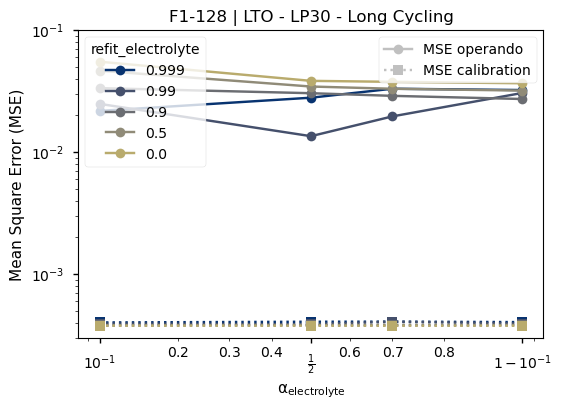

In [35]:
num=128
df_mse = dic_df_mse_4_3_HardCalib_fitElectrolyte[num]
fig, ax = plot_mse_alphael_refit_electrolyte(df_mse)
_ = ax.set_title(f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}")

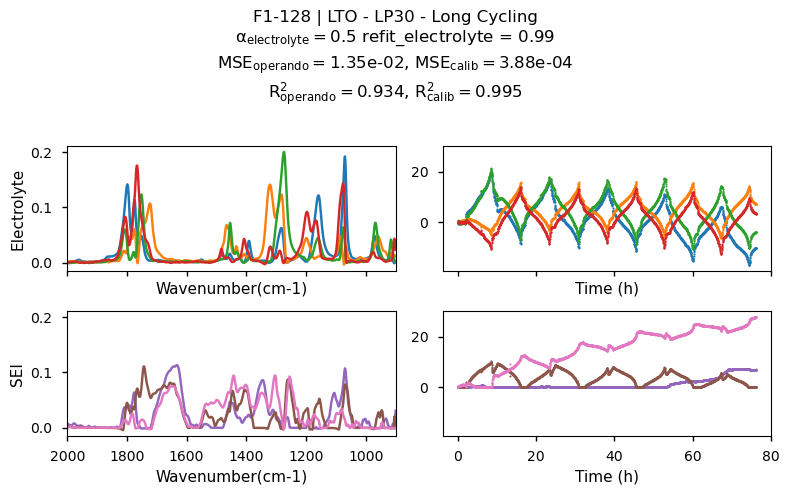

In [36]:
num=128
Lmcrar = dic_LMCR_4_3_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_3_HardCalib_fitElectrolyte[num]
index = df_mse.query('alpha_electrolyte==0.5 & refit_electrolyte==.99').index[0]
mcrar=Lmcrar[index]
fig, axs = plot_mcar_components_together(mcrar, Lidxs=[[0, 1, 2, 3], [4, 5, 6]],
                                         Lwn = mcrar.Lwn, I_C=slice(0, -X_calib.shape[0]), xlim=(wn_max, wn_min),
                                         Lth = mcrar.Lth, figsize=(8,5))
fig.suptitle( f"{Operando[num].cell_id} | {Operando[num].su['Tag For Paper']}" +
            '\n$\\alpha_{electrolyte} = ' + str(mcrar.alpha_electrolyte) + '$ refit_electrolyte = ' + str(df_mse.loc[index, 'refit_electrolyte']) +'\n'
            "$MSE_{operando}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse operando'])+", $MSE_{calib}=$"+ "{:.2e}".format(df_mse.iloc[index]['mse calib'])+'\n'+
            "$R^2_{operando}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 operando'])+", $R^2_{calib}=$"+ "{:.3f}".format(df_mse.iloc[index]['R2 calib'])+'\n')

save_export_MCRALS_indiv(mcrar, df_mse, index, computation_name = 'F1-128_4_3_HardElec_RefitElec_')


In [37]:
num=128
Lmcrar = dic_LMCR_4_3_HardCalib_fitElectrolyte[num]
df_mse = dic_df_mse_4_3_HardCalib_fitElectrolyte[num]
index = df_mse.query('alpha_electrolyte==0.5 & refit_electrolyte==.99').index[0]
mcrar=Lmcrar[index]

In [38]:
mcrar=Lmcrar[index]


In [39]:
mcrar.ST_.shape

(7, 772)

## Electrolyte Only Calibration spectra

In [49]:
X_calib2 = tirLIPF6ECDMC.NdAB[:, wn_max:wn_min].data
X_calib = X_calib2
X_calib = X_calib/np.sqrt((X_calib**2).sum()/X_calib.size)

# MCR-ALS for electrolyte initialization
ST_electrolyte = initialize_calibration_X_calib(X_calib, mcrar_1='auto', n_electrolyte=n_electrolyte)


Half-iterated 51 times since min error. Exiting.
<class 'numpy.ndarray'>


(<Figure size 1000x300 with 1 Axes>,
 (2000.0, 800.0))

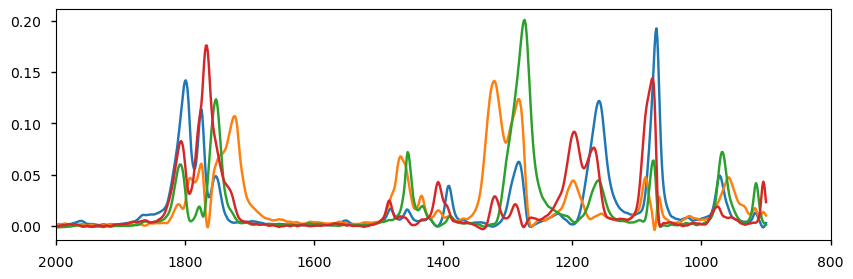

In [55]:
plt.figure(figsize=(10,3)), plt.plot(Lwn, ST_electrolyte.T), plt.xlim(2000,800)